In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,optimizers,datasets
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tfds

In [17]:
df = tf.keras.datasets.fashion_mnist.load_data()

In [18]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [8]:
num_class = 10

#One Hot Encoding
y_train = keras.utils.to_categorical(y_train,num_class)
y_test = keras.utils.to_categorical(y_test,num_class)

In [9]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

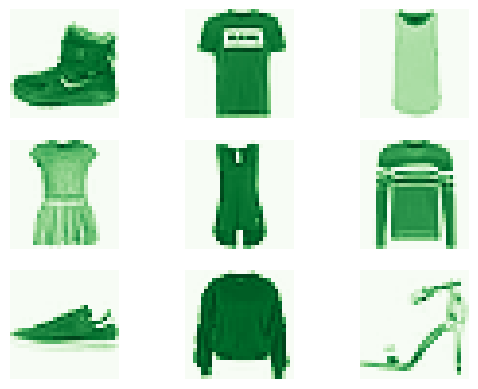

In [33]:
plt.figure
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[i],cmap='Greens')
  plt.axis('off')

plt.show()

In [22]:
x_train = X_train.reshape(60000,784)
x_test = X_test.reshape(10000,784)

In [23]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [24]:
model_data = keras.Sequential()

In [25]:
model_data.add(layers.Dense(512,activation='relu',input_dim=784))
model_data.add(layers.Dense(256,activation='relu'))
model_data.add(layers.Dense(128,activation='relu'))
model_data.add(layers.Dense(10,activation='softmax'))

In [26]:
model_data.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [27]:
Optimizer = optimizers.Adam(learning_rate=0.0001)
model_data.compile(loss=keras.losses.categorical_crossentropy,optimizer=Optimizer, metrics=['accuracy'])

In [28]:
predict = model_data.predict(x_test)

313/313 [==============================] - 1s 2ms/step


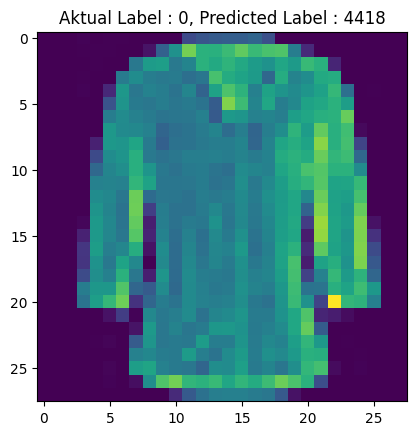

In [31]:
label = np.argmax(predict,axis=0)
ActualLabel = np.argmax(y_test[7])



img = x_test[4].reshape(28, 28)

plt.title(f"Aktual Label : {ActualLabel}, Predicted Label : {label[7]}")

plt.imshow(img)
plt.show()